In [200]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import re
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords
from string import punctuation
from nltk.tokenize import word_tokenize
from nltk.stem.lancaster import LancasterStemmer
from nltk.stem import WordNetLemmatizer
import nltk
nltk.download('punkt')
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import RandomOverSampler, SMOTE
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import cross_val_score,train_test_split as tts
from sklearn.metrics import accuracy_score,classification_report,roc_auc_score,f1_score
import gensim
from gensim import corpora
from gensim.models.ldamodel import LdaModel

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [201]:
df=pd.read_csv("/content/drive/My Drive/Krishna Sentiment Analysis/Consumer_Complaints.csv")
df.head()

,Consumer complaint narrative,Product
0,I have outdated information on my credit repor...,Credit reporting
1,I purchased a new car on XXXX XXXX. The car de...,Consumer Loan
2,An account on my credit report has a mistaken ...,Credit reporting
3,This company refuses to provide me verificatio...,Debt collection
4,This complaint is in regards to Square Two Fin...,Debt collection


In [0]:
#Random taking sample of 60000 complaints to make model building simple
df=df.sample(n = 60000, replace = False) 

In [203]:
df.shape

(60000, 2)

Text(0, 0.5, 'Type of Complaint')

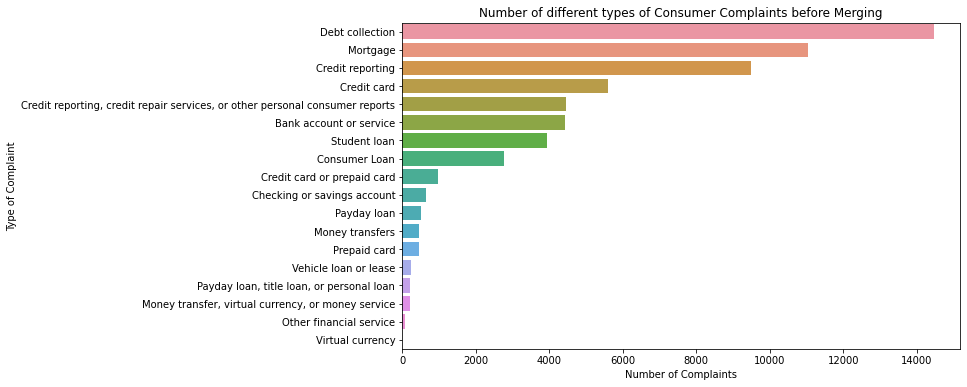

In [204]:
plt.figure(figsize=(10,6))
sns.barplot(x=df["Product"].value_counts(),y=df["Product"].value_counts().index)
plt.title("Number of different types of Consumer Complaints before Merging")
plt.xlabel("Number of Complaints")
plt.ylabel("Type of Complaint")

## Merging the similar Product Complaints Type

In [0]:
#Merging complaints belonging to same department
df["Product"]=df["Product"].replace("Credit reporting","Credit reporting, credit repair services, or other personal consumer reports")
df["Product"]=df["Product"].replace("Credit card","Credit card or prepaid card")
df["Product"]=df["Product"].replace("Prepaid card","Credit card or prepaid card")
df["Product"]=df["Product"].replace("Virtual currency","Money transfer, virtual currency, or money service")
df["Product"]=df["Product"].replace("Payday loan","Payday loan, title loan, or personal loan")
df["Product"]=df["Product"].replace("Money transfers","Money transfer, virtual currency, or money service")

Text(0, 0.5, 'Type of Complaint')

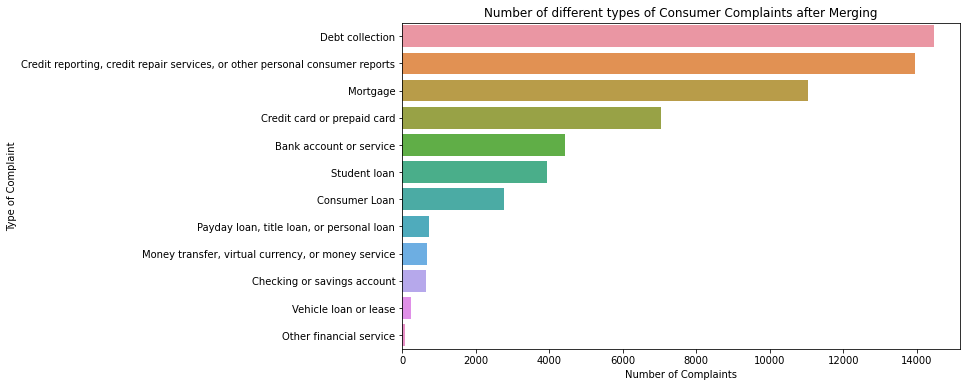

In [206]:
plt.figure(figsize=(10,6))
sns.barplot(x=df["Product"].value_counts(),y=df["Product"].value_counts().index)
plt.title("Number of different types of Consumer Complaints after Merging")
plt.xlabel("Number of Complaints")
plt.ylabel("Type of Complaint")

Text(0, 0.5, 'Type of Complaint')

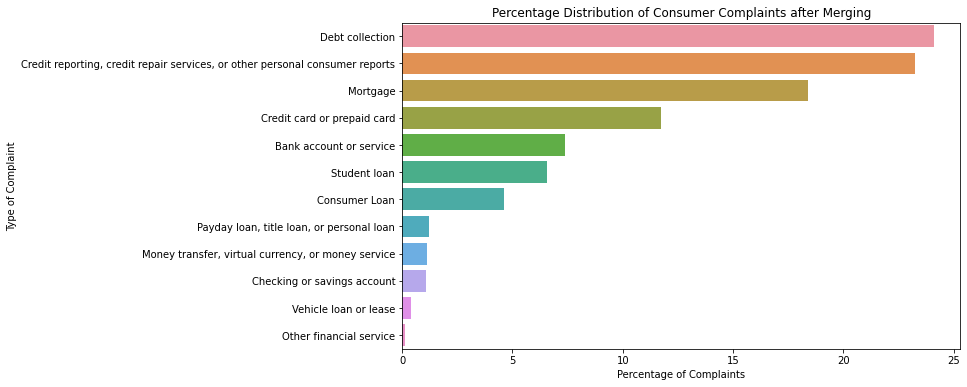

In [207]:
plt.figure(figsize=(10,6))
sns.barplot(x=(df["Product"].value_counts()/df.shape[0])*100,y=df["Product"].value_counts().index)
plt.title("Percentage Distribution of Consumer Complaints after Merging")
plt.xlabel("Percentage of Complaints")
plt.ylabel("Type of Complaint")

## Feature Engineering 

In [0]:
num_words=[]
length=[]
for i in range (df.shape[0]):
  num_words.append((len(list(df["Consumer complaint narrative"].iloc[i].split()))))
  length.append((len(list(df["Consumer complaint narrative"].iloc[i]))))

df["Word Count"]=num_words
df["Length of complaint"]=length
df["Characters/Word"]=df["Length of complaint"]/df["Word Count"]

Text(0.5, 1.0, 'Distribution of Word Count for different Types of Complaints')

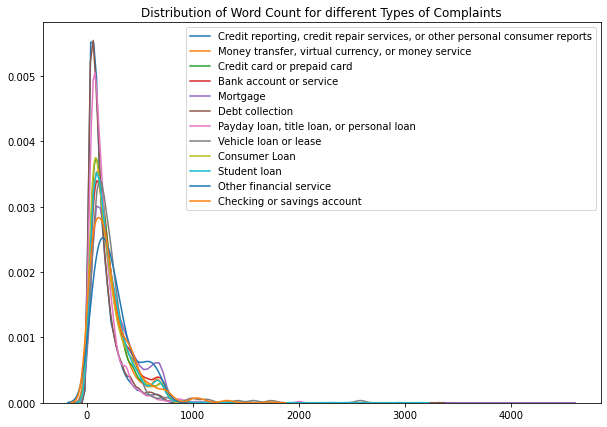

In [209]:
plt.figure(figsize=(10,7))
for p in df["Product"].unique():
  sns.kdeplot(df[df["Product"]==p]["Word Count"],label=p)
plt.title("Distribution of Word Count for different Types of Complaints")

Text(0.5, 1.0, 'Distribution of Length of different Types of Complaints')

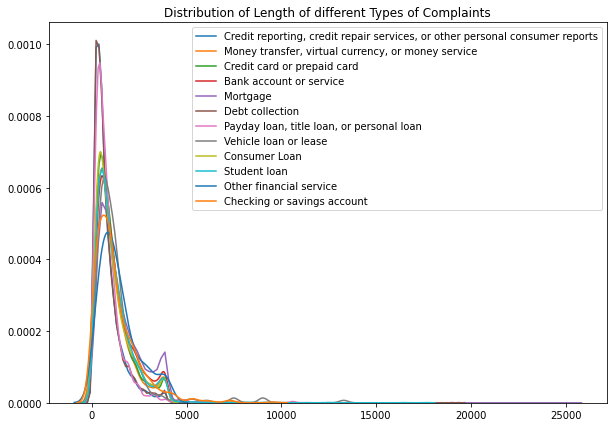

In [210]:
plt.figure(figsize=(10,7))
for p in df["Product"].unique():
  sns.kdeplot(df[df["Product"]==p]["Length of complaint"],label=p)
plt.title("Distribution of Length of different Types of Complaints")

Text(0.5, 1.0, 'Distribution of Characters per Word for different types of Cases')

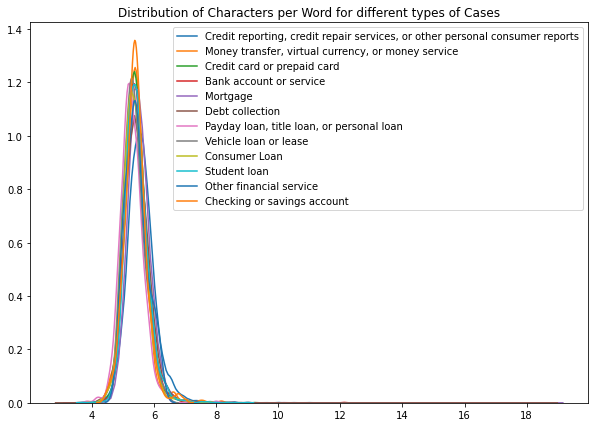

In [211]:
plt.figure(figsize=(10,7))
for p in df["Product"].unique():
  sns.kdeplot(df[df["Product"]==p]["Characters/Word"],label=p)
plt.title("Distribution of Characters per Word for different types of Cases")

In [0]:
data=df["Consumer complaint narrative"].tolist()
stuff_to_be_removed = list(stopwords.words("english"))+list(punctuation)
final_corpus=[]
for i in range(len(data)):
    text=word_tokenize(data[i].lower())
    text = [t for t in text if len(t)>3]
    text=[re.sub(r'[xx]*', '',t) for t in text]
    text=[re.sub(r'//', '',t) for t in text]
    text=[w for w in text if w not in stuff_to_be_removed]
    sent=" ".join(text)
    final_corpus.append(sent)

In [0]:
eda_df=pd.DataFrame(final_corpus,columns=["Complaints"])
eda_df["Product"]=df["Product"].tolist()

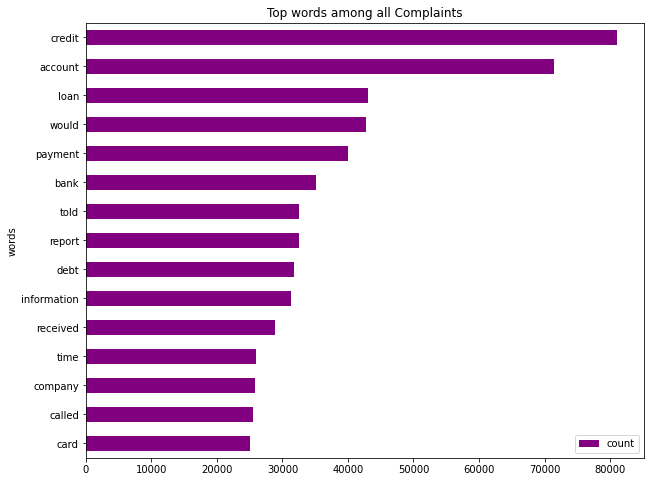

In [0]:
import itertools
import collections
def top_words(corpus):
  words = [word.lower().split() for word in eda_df['Complaints']]
  all_words = list(itertools.chain(*words))
  counts = collections.Counter(all_words)
  df1 = pd.DataFrame(counts.most_common(15),columns=['words', 'count'])
  return df1
df1 = top_words(eda_df['Complaints'])
def plot_top_words(df1):
  fig, ax = plt.subplots(figsize=(10, 8))
  plt.title('Top words among all Complaints')
  df1.sort_values(by='count').plot.barh(x='words',y='count',ax=ax,color="purple")

plot_top_words(df1)

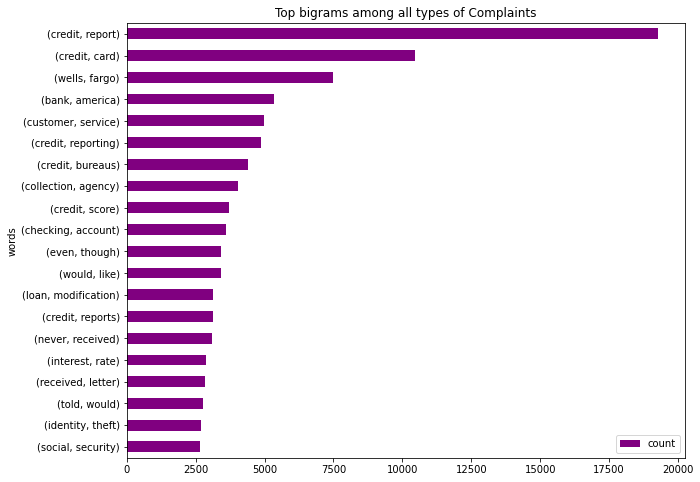

In [0]:
from nltk import bigrams, trigrams
def Bigrams(corpus):
  words = [word.lower().split() for word in corpus]
  words = [list(bigrams(word)) for word in words]
  all_words = list(itertools.chain(*words))
  counts = collections.Counter(all_words)
  df1 = pd.DataFrame(counts.most_common(20),columns=['words', 'count'])
  return df1

df1 = Bigrams(eda_df['Complaints'])
fig, ax = plt.subplots(figsize=(10, 8))
plt.title('Top bigrams among all types of Complaints')
df1.sort_values(by='count').plot.barh(x='words',y='count',ax=ax,color="purple")

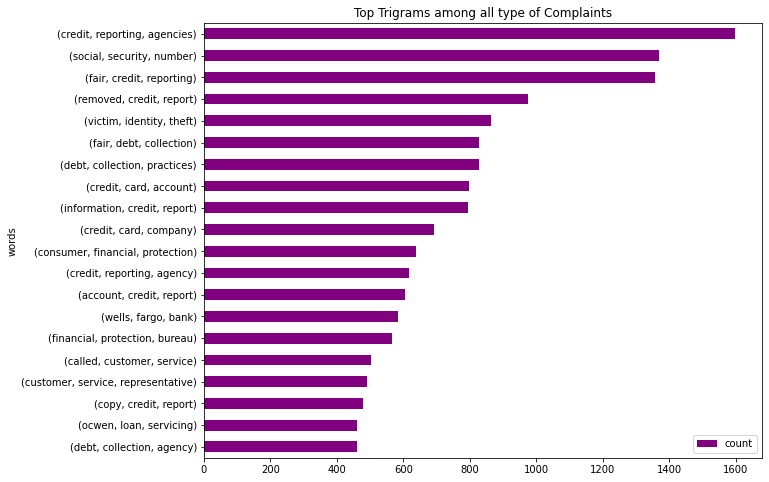

In [0]:
def Trigrams(corpus):
  words = [word.lower().split() for word in corpus]
  words = [list(trigrams(word)) for word in words]
  all_words = list(itertools.chain(*words))
  counts = collections.Counter(all_words)
  df1 = pd.DataFrame(counts.most_common(20),columns=['words', 'count'])
  return df1
df1 = Trigrams(eda_df['Complaints'])
fig, ax = plt.subplots(figsize=(10, 8))
plt.title('Top Trigrams among all type of Complaints')
df1.sort_values(by='count').plot.barh(x='words',y='count',ax=ax,color="purple")

## Data Cleaning Stemming and Lemmatizing

In [0]:
def cleaning_text(text):
   text = text.lower()
   text = re.sub('\[.*?\]', '', text)
  #  text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
   text = re.sub('\w*\d\w*', '', text)
   text = re.sub(r'[xx]*', '',text)
   text = re.sub(r'\b\w\b','',text)
   text = re.sub(r'//','',text)
   text = re.sub(r'^\s+|\s$','',text)
   text = re.sub(r'\s+',' ',text)
   text = re.sub(r'\*',' ',text)
   return text
clean_text = lambda x: cleaning_text(x)

In [0]:
lancaster_stemmer = LancasterStemmer()
wordnet_lemmatizer = WordNetLemmatizer()

In [0]:
function_cleaned=df["Consumer complaint narrative"].apply(clean_text)

In [0]:
cleaned_stemmed=[lancaster_stemmer.stem(w) for w in function_cleaned]
cleaned_lemmatized=[wordnet_lemmatizer.lemmatize(w) for w in function_cleaned]

In [0]:
new_df_stemmed=pd.DataFrame(cleaned_stemmed,columns=["Complaints"])

In [0]:
new_df_lemmatized=pd.DataFrame(cleaned_lemmatized,columns=["Complaints"])

In [0]:
labels=df["Product"].tolist()
new_df_stemmed["Product"]=labels
new_df_lemmatized["Product"]=labels

In [0]:
le=LabelEncoder()
new_df_stemmed["Product"]=le.fit_transform(new_df_stemmed["Product"])
new_df_lemmatized["Product"]=le.fit_transform(new_df_lemmatized["Product"])

In [0]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer

In [0]:
cv=CountVectorizer(stop_words='english')
tfidf=TfidfVectorizer(stop_words='english')

In [0]:
vector_cv_stemmed=cv.fit_transform(new_df_stemmed["Complaints"])
vector_cv_lemmatized=cv.fit_transform(new_df_lemmatized["Complaints"])
vector_tfidf_stemmed=tfidf.fit_transform(new_df_stemmed["Complaints"])
vector_tfidf_lemmatized=tfidf.fit_transform(new_df_lemmatized["Complaints"])

In [0]:
X1=vector_cv_stemmed
X2=vector_tfidf_stemmed
y=new_df_stemmed["Product"]

In [0]:
from sklearn.model_selection import train_test_split as tts
X_train_s,X_test_s,y_train_s,y_test_s=tts(X1,y,test_size=0.25,random_state=0)
X_train_l,X_test_l,y_train_l,y_test_l=tts(X2,y,test_size=0.25,random_state=0)

In [225]:
ro=RandomOverSampler(random_state=42)
sm=SMOTE(random_state=42)
X_train_scro,y_train_scro=ro.fit_sample(X_train_s,y_train_s)
X_train_scsm,y_train_scsm=sm.fit_sample(X_train_s,y_train_s)
X_train_stro,y_train_stro=ro.fit_sample(X_train_l,y_train_l)
X_train_stsm,y_train_stsm=sm.fit_sample(X_train_l,y_train_l)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


## Lancaster Stemmer - Count Vectorizer and TF-IDF Vectorizer - Random Oversampling and SMOTE

In [0]:
nb_scro=MultinomialNB()
nb_scsm=MultinomialNB()
nb_stro=MultinomialNB()
nb_stsm=MultinomialNB()

In [227]:
nb_scro.fit(X_train_scro,y_train_scro)
nb_scsm.fit(X_train_scsm,y_train_scsm)
nb_stro.fit(X_train_stro,y_train_stro)
nb_stsm.fit(X_train_stsm,y_train_stsm)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [0]:
y_pred_nb1=nb_scro.predict(X_test_s)
y_pred_nb2=nb_scsm.predict(X_test_s)
y_pred_nb3=nb_stro.predict(X_test_s)
y_pred_nb4=nb_stsm.predict(X_test_s)

In [229]:
print("F1-Score of Stammer-Count Vectorizer-Random Oversampling: ",f1_score(y_test_s,y_pred_nb1,average='weighted'))
print("F1-Score of Stammer-Count Vectorizer-SMOTE: ",f1_score(y_test_s,y_pred_nb2,average='weighted'))
print("F1-Score of Stammer-TF_IDF Vectorizer-Random Oversampling: ",f1_score(y_test_s,y_pred_nb3,average='weighted'))
print("F1-Score of Stammer-TF_IDF Vectorizer-SMOTE: ",f1_score(y_test_s,y_pred_nb4,average='weighted'))

F1-Score of Stammer-Count Vectorizer-Random Oversampling:  0.7875918901918139
F1-Score of Stammer-Count Vectorizer-SMOTE:  0.7949088166000561
F1-Score of Stammer-TF_IDF Vectorizer-Random Oversampling:  0.7846660756473678
F1-Score of Stammer-TF_IDF Vectorizer-SMOTE:  0.7885629521647874


In [230]:
print("Average 5-Fold Cross validated F1-Score of Stammer-Count Vectorizer-Random Oversampling: ",
      cross_val_score(estimator=nb_scro,X=X1,y=y,cv=5,scoring='f1_weighted').mean())
print("Average 5-Fold Cross validated F1-Score of Stammer-Count Vectorizer-SMOTE: ",
      cross_val_score(estimator=nb_scsm,X=X1,y=y,cv=5,scoring='f1_weighted').mean())
print("Average 5-Fold Cross validated F1-Score of Stammer-TF_IDF Vectorizer-Random Oversampling: ",
      cross_val_score(estimator=nb_stro,X=X2,y=y,cv=5,scoring='f1_weighted').mean())
print("Average 5-Fold Cross validated F1-Score of Stammer-TF_IDF Vectorizer-SMOTE: ",
      cross_val_score(estimator=nb_stsm,X=X2,y=y,cv=5,scoring='f1_weighted').mean())

Average 5-Fold Cross validated F1-Score of Stammer-Count Vectorizer-Random Oversampling:  0.7904907225343776
Average 5-Fold Cross validated F1-Score of Stammer-Count Vectorizer-SMOTE:  0.7904907225343776
Average 5-Fold Cross validated F1-Score of Stammer-TF_IDF Vectorizer-Random Oversampling:  0.6735991136429826
Average 5-Fold Cross validated F1-Score of Stammer-TF_IDF Vectorizer-SMOTE:  0.6735991136429826


## WordNet Lemmatizer - Count and TF-IDF Vectorizer - Random Oversampling and SMOTE

In [0]:
X3=vector_cv_lemmatized
X4=vector_tfidf_lemmatized
y=new_df_lemmatized["Product"]

In [0]:
from sklearn.model_selection import train_test_split as tts
X_train_lc,X_test_lc,y_train_lc,y_test_lc=tts(X3,y,test_size=0.25,random_state=0)
X_train_lt,X_test_lt,y_train_lt,y_test_lt=tts(X4,y,test_size=0.25,random_state=0)

In [233]:
X_train_lcro,y_train_lcro=ro.fit_sample(X_train_lc,y_train_lc)
X_train_lcsm,y_train_lcsm=sm.fit_sample(X_train_lc,y_train_lc)
X_train_ltro,y_train_ltro=ro.fit_sample(X_train_lt,y_train_lt)
X_train_ltsm,y_train_ltsm=sm.fit_sample(X_train_lt,y_train_lt)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [0]:
nb_lcro=MultinomialNB()
nb_lcsm=MultinomialNB()
nb_ltro=MultinomialNB()
nb_ltsm=MultinomialNB()

In [235]:
nb_lcro.fit(X_train_lcro,y_train_lcro)
nb_lcsm.fit(X_train_lcsm,y_train_lcsm)
nb_ltro.fit(X_train_ltro,y_train_ltro)
nb_ltsm.fit(X_train_ltsm,y_train_ltsm)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [0]:
y_pred_nb5=nb_lcro.predict(X_test_lc)
y_pred_nb6=nb_lcsm.predict(X_test_lc)
y_pred_nb7=nb_ltro.predict(X_test_lt)
y_pred_nb8=nb_ltsm.predict(X_test_lt)

In [237]:
print("F1-Score of Lemmatizer-Count Vectorizer-Random Oversampling: ",f1_score(y_test_lc,y_pred_nb5,average='weighted'))
print("F1-Score of Lemmatizer-Count Vectorizer-SMOTE: ",f1_score(y_test_lc,y_pred_nb6,average='weighted'))
print("F1-Score of Lemmatizer-TF_IDF Vectorizer-Random Oversampling: ",f1_score(y_test_lt,y_pred_nb7,average='weighted'))
print("F1-Score of Lemmatizer-TF_IDF Vectorizer-SMOTE: ",f1_score(y_test_lt,y_pred_nb8,average='weighted'))

F1-Score of Lemmatizer-Count Vectorizer-Random Oversampling:  0.7877402961924387
F1-Score of Lemmatizer-Count Vectorizer-SMOTE:  0.7949702940710518
F1-Score of Lemmatizer-TF_IDF Vectorizer-Random Oversampling:  0.7825392265738106
F1-Score of Lemmatizer-TF_IDF Vectorizer-SMOTE:  0.7881678110529361


In [238]:
print("Average 5-Fold Cross validated F1-Score of Stammer-Count Vectorizer-Random Oversampling: ",
      cross_val_score(estimator=nb_lcro,X=X3,y=y,cv=5,scoring='f1_weighted').mean())
print("Average 5-Fold Cross validated F1-Score of Stammer-Count Vectorizer-SMOTE: ",
      cross_val_score(estimator=nb_lcsm,X=X3,y=y,cv=5,scoring='f1_weighted').mean())
print("Average 5-Fold Cross validated F1-Score of Stammer-TF_IDF Vectorizer-Random Oversampling: ",
       cross_val_score(estimator=nb_ltro,X=X4,y=y,cv=5,scoring='f1_weighted').mean())
print("Average 5-Fold Cross validated F1-Score of Stammer-TF_IDF Vectorizer-SMOTE: ",
       cross_val_score(estimator=nb_ltsm,X=X4,y=y,cv=5,scoring='f1_weighted').mean())

Average 5-Fold Cross validated F1-Score of Stammer-Count Vectorizer-Random Oversampling:  0.7905190118112005
Average 5-Fold Cross validated F1-Score of Stammer-Count Vectorizer-SMOTE:  0.7905190118112005
Average 5-Fold Cross validated F1-Score of Stammer-TF_IDF Vectorizer-Random Oversampling:  0.6735749383688109
Average 5-Fold Cross validated F1-Score of Stammer-TF_IDF Vectorizer-SMOTE:  0.6735749383688109


## Topic Modelling

Let's perform topic modeling for "Vehicle loan or lease" type complaints, since the proportion of these type of complaints are very less.

### Latent Semantic Analysis

In [0]:
new_df_stemmed["Product"]=le.inverse_transform(new_df_stemmed["Product"])
new_df_lemmatized["Product"]=le.inverse_transform(new_df_lemmatized["Product"])

In [0]:
vehicle_complaints_stemmed=new_df_stemmed[new_df_stemmed["Product"]=="Vehicle loan or lease"]
vehicle_complaints_lemmatized=new_df_lemmatized[new_df_lemmatized["Product"]=="Vehicle loan or lease"]

In [0]:
from sklearn.decomposition import TruncatedSVD
from pprint import pprint

In [0]:
X_cv=cv.fit_transform(vehicle_complaints_stemmed["Complaints"])
X_tfidf=tfidf.fit_transform(vehicle_complaints_stemmed["Complaints"])

In [0]:
svd_cv = TruncatedSVD(n_components=5,n_iter=100,random_state=6)
svd_tfidf = TruncatedSVD(n_components=5,n_iter=100,random_state=6)

In [244]:
svd_cv.fit(X_cv)
svd_tfidf.fit(X_tfidf)

TruncatedSVD(algorithm='randomized', n_components=5, n_iter=100, random_state=6,
             tol=0.0)

In [245]:
terms=cv.get_feature_names()
for i,comp in enumerate(svd_cv.components_):
  terms_comp = zip(terms,comp)
  sorted_terms = sorted(terms_comp, key= lambda x:x[1], reverse=True)[:10]
  pprint("Topic "+str(i)+": ")
  pprint(sorted_terms)

'Topic 0: '
[('car', 0.33707945396282113),
 ('payment', 0.273716869461099),
 ('told', 0.2440803101338859),
 ('did', 0.2223251814233639),
 ('loan', 0.19334056017316414),
 ('credit', 0.18406423325677962),
 ('financial', 0.18302755920746294),
 ('payments', 0.16765386189453368),
 ('time', 0.1587878733035221),
 ('account', 0.14968205779557092)]
'Topic 1: '
[('financial', 0.3739945635459409),
 ('westlake', 0.33369917792182296),
 ('services', 0.332767978793697),
 ('check', 0.30734946152008125),
 ('provided', 0.17733573979272232),
 ('phone', 0.17061771399947323),
 ('number', 0.16097232565210892),
 ('supervisor', 0.14821897995097957),
 ('payoff', 0.1276979789281427),
 ('service', 0.12151529974866167)]
'Topic 2: '
[('payment', 0.286330666278081),
 ('stated', 0.26705695591309897),
 ('truck', 0.23399563540506918),
 ('bubba', 0.19824905245811647),
 ('hill', 0.19824905245811647),
 ('auto', 0.1857904160233914),
 ('late', 0.1805115184021956),
 ('plaza', 0.16520754371509702),
 ('credit', 0.129481602295

In [246]:
terms=tfidf.get_feature_names()
for i,comp in enumerate(svd_tfidf.components_):
  terms_comp = zip(terms,comp)
  sorted_terms = sorted(terms_comp, key= lambda x:x[1], reverse=True)[:10]
  pprint("Topic "+str(i)+": ")
  pprint(sorted_terms)

'Topic 0: '
[('payment', 0.2613610194740846),
 ('car', 0.23268517733380498),
 ('loan', 0.22018087752522766),
 ('credit', 0.1859379781170381),
 ('late', 0.1845926998658377),
 ('payments', 0.1740913952439052),
 ('account', 0.17208829587426172),
 ('vehicle', 0.1706021068810393),
 ('paid', 0.14113922420615557),
 ('told', 0.13698464404473712)]
'Topic 1: '
[('days', 0.2786706905711952),
 ('late', 0.2524584915504725),
 ('shocked', 0.2499473914825541),
 ('reviewed', 0.24697149871127938),
 ('past', 0.22260278022163396),
 ('statements', 0.21967089339929813),
 ('thought', 0.2160183731829845),
 ('dates', 0.21490116300045764),
 ('happened', 0.20732438908648443),
 ('sure', 0.20267540008144105)]
'Topic 2: '
[('car', 0.29023430831273317),
 ('vehicle', 0.19072500454073907),
 ('shocked', 0.1736773381320949),
 ('loan', 0.17360613505968042),
 ('reviewed', 0.17038143155718102),
 ('santander', 0.1556325061661598),
 ('statements', 0.14995382777409863),
 ('sure', 0.1471466257123563),
 ('dates', 0.146694105008

### Linear Discriminant Analysis

In [0]:
words = [word_tokenize(text) for text in eda_df[eda_df["Product"]=="Vehicle loan or lease"]["Complaints"]]
dictionary = corpora.Dictionary(words)

In [0]:
doc_term_matrix = [dictionary.doc2bow(doc) for doc in words]

In [0]:
lda = LdaModel(corpus=doc_term_matrix,num_topics=5,id2word=dictionary,passes=50)

In [251]:
pprint(lda.print_topics(num_topics=5,num_words=10))

[(0,
  '0.016*"credit" + 0.016*"payment" + 0.015*"would" + 0.013*"loan" + '
  '0.012*"vehicle" + 0.011*"told" + 0.009*"account" + 0.009*"could" + '
  '0.008*"time" + 0.007*"said"'),
 (1,
  '0.012*"told" + 0.011*"loan" + 0.009*"check" + 0.009*"payment" + '
  '0.008*"capital" + 0.008*"payments" + 0.008*"called" + 0.008*"account" + '
  '0.007*"contract" + 0.007*"would"'),
 (2,
  '0.015*"credit" + 0.011*"vehicle" + 0.010*"loan" + 0.009*"dealership" + '
  '0.009*"would" + 0.008*"lease" + 0.008*"payment" + 0.008*"back" + '
  '0.006*"bank" + 0.005*"told"'),
 (3,
  '0.027*"payment" + 0.018*"loan" + 0.016*"payments" + 0.014*"late" + '
  '0.013*"would" + 0.012*"paid" + 0.012*"told" + 0.011*"account" + '
  '0.010*"fees" + 0.009*"called"'),
 (4,
  '0.016*"credit" + 0.010*"loan" + 0.010*"would" + 0.009*"received" + '
  '0.008*"also" + 0.008*"account" + 0.008*"report" + 0.007*"told" + '
  '0.007*"vehicle" + 0.006*"company"')]
